In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [201]:
df = pd.read_csv('D:\\Air Quality Project\\PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [202]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  str    
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), str(1)
memory usage: 4.3 MB


In [203]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [204]:
df['datetime'] = pd.to_datetime(df[['year','month','day','hour']])
df = df.set_index('datetime')
df = df.sort_index()

In [205]:
df.drop(['No','year','month','day','hour'], axis=1, inplace=True)

In [206]:
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [207]:
df.isnull().sum()

pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [208]:
df['pm2.5'] = df['pm2.5'].interpolate(method='time')
# Use backfill then forward fill to handle NaN at the beginning
df['pm2.5'] = df['pm2.5'].bfill().ffill()

In [209]:
df.isnull().sum()

pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [210]:
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,
2010-01-01 00:00:00,129.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,129.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,129.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,129.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,129.0,-20,-12.0,1018.0,NW,12.97,0,0


In [211]:
df['hour'] = df.index.hour
# Day of the Week (0-6)
df['dayofweek'] = df.index.dayofweek
# Day of the Month (1-31)
df['dayofmonth'] = df.index.day 
df['month'] = df.index.month
df['dayofyear'] = df.index.dayofyear
df['dayname'] = df.index.day_name()


# Cyclic encoding
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [212]:
df.columns

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'hour',
       'dayofweek', 'dayofmonth', 'month', 'dayofyear', 'dayname', 'hour_sin',
       'hour_cos', 'month_sin', 'month_cos'],
      dtype='str')

In [213]:
# Create one-hot encoded columns for wind direction
wind_dummies = pd.get_dummies(df['cbwd'], prefix='wd')

# Join these new columns to your main dataframe
df = pd.concat([df, wind_dummies], axis=1)

day_dummies = pd.get_dummies(df['dayname'], prefix='day')

# Join them back to your main dataframe
df = pd.concat([df, day_dummies], axis=1)

In [214]:
df.drop('cbwd', axis=1, inplace=True)
df.drop(['dayname'], axis=1, inplace=True)

In [215]:
df.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,hour,dayofweek,dayofmonth,...,wd_NW,wd_SE,wd_cv,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,129.0,-21,-11.0,1021.0,1.79,0,0,0,4,1,...,True,False,False,True,False,False,False,False,False,False
2010-01-01 01:00:00,129.0,-21,-12.0,1020.0,4.92,0,0,1,4,1,...,True,False,False,True,False,False,False,False,False,False
2010-01-01 02:00:00,129.0,-21,-11.0,1019.0,6.71,0,0,2,4,1,...,True,False,False,True,False,False,False,False,False,False
2010-01-01 03:00:00,129.0,-21,-14.0,1019.0,9.84,0,0,3,4,1,...,True,False,False,True,False,False,False,False,False,False
2010-01-01 04:00:00,129.0,-20,-12.0,1018.0,12.97,0,0,4,4,1,...,True,False,False,True,False,False,False,False,False,False


In [216]:
df.columns 

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'hour', 'dayofweek',
       'dayofmonth', 'month', 'dayofyear', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'wd_NE', 'wd_NW', 'wd_SE', 'wd_cv', 'day_Friday',
       'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday'],
      dtype='str')

#### Preprocessing of pm2.5 from right-skewed to bell shape

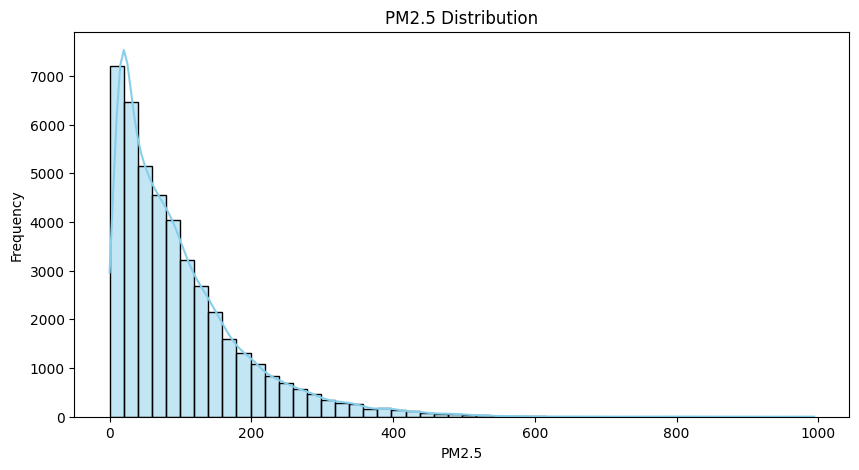

In [217]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['pm2.5'], bins=50, kde=True, color='skyblue')
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

In [218]:
# 1. Address Skewness first
# log1p is log(1 + x), which handles any 0 values safely
df['pm25_processed'] = np.log1p(df['pm2.5'])

# 2. Reshape and Scale for the LSTM
df['pm25_processed'] = df['pm25_processed'].values.reshape(-1, 1)

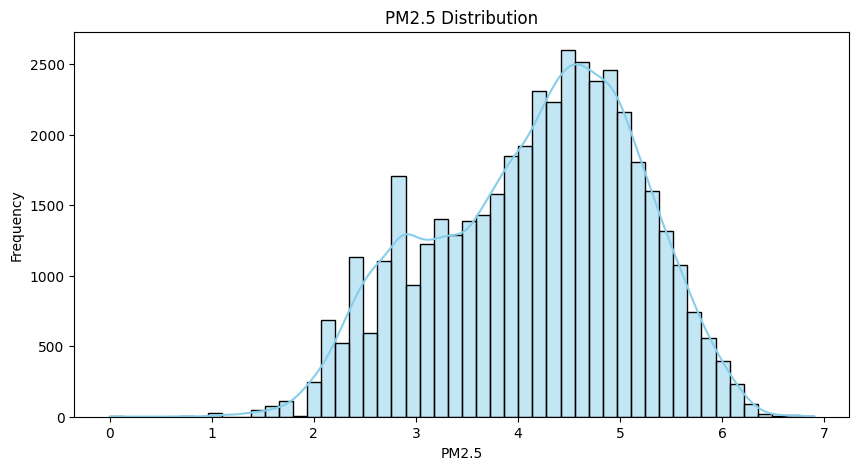

In [219]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['pm25_processed'], bins=50, kde=True, color='skyblue')
plt.title("PM2.5 Distribution")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

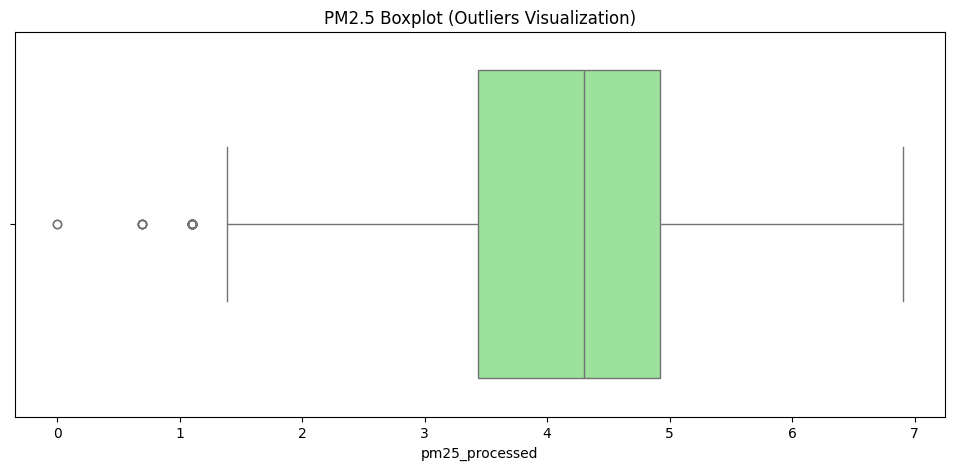

In [220]:
plt.figure(figsize=(12,5))
sns.boxplot(x='pm25_processed', data=df, color='lightgreen')
plt.title("PM2.5 Boxplot (Outliers Visualization)")
plt.show()

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_19836\587168753.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='temp_day', y='pm25_processed', data=df_plot, order=order, palette='Reds')


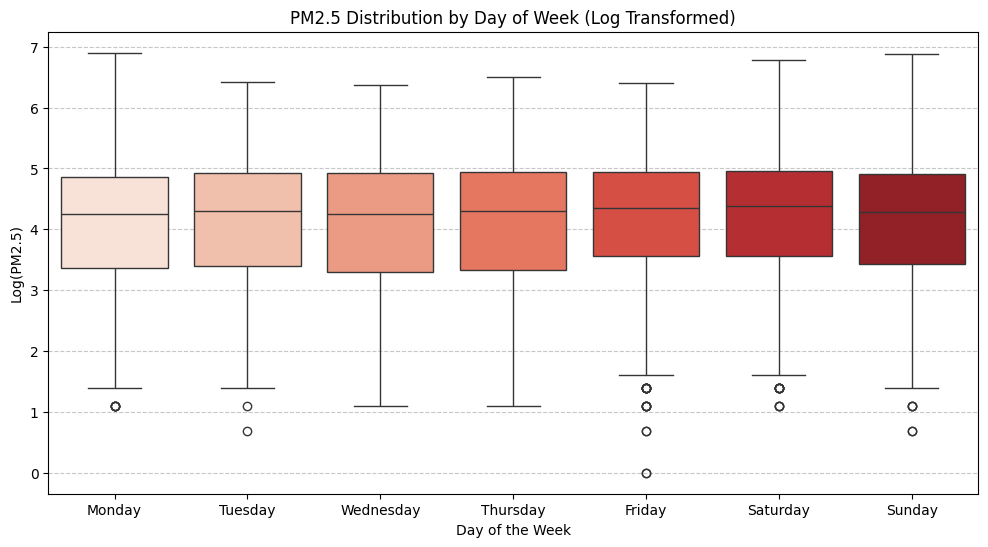

In [221]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Temporarily identify the day name from the One-Hot columns
# Assuming your columns start with 'day_' (e.g., day_Monday, day_Tuesday)
day_cols = [col for col in df.columns if col.startswith('day_')]
df_plot = df.copy()
df_plot['temp_day'] = df[day_cols].idxmax(axis=1).str.replace('day_', '')

# 2. Plot using the temporary column
plt.figure(figsize=(12, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sns.boxplot(x='temp_day', y='pm25_processed', data=df_plot, order=order, palette='Reds')

plt.title('PM2.5 Distribution by Day of Week (Log Transformed)')
plt.xlabel('Day of the Week')
plt.ylabel('Log(PM2.5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

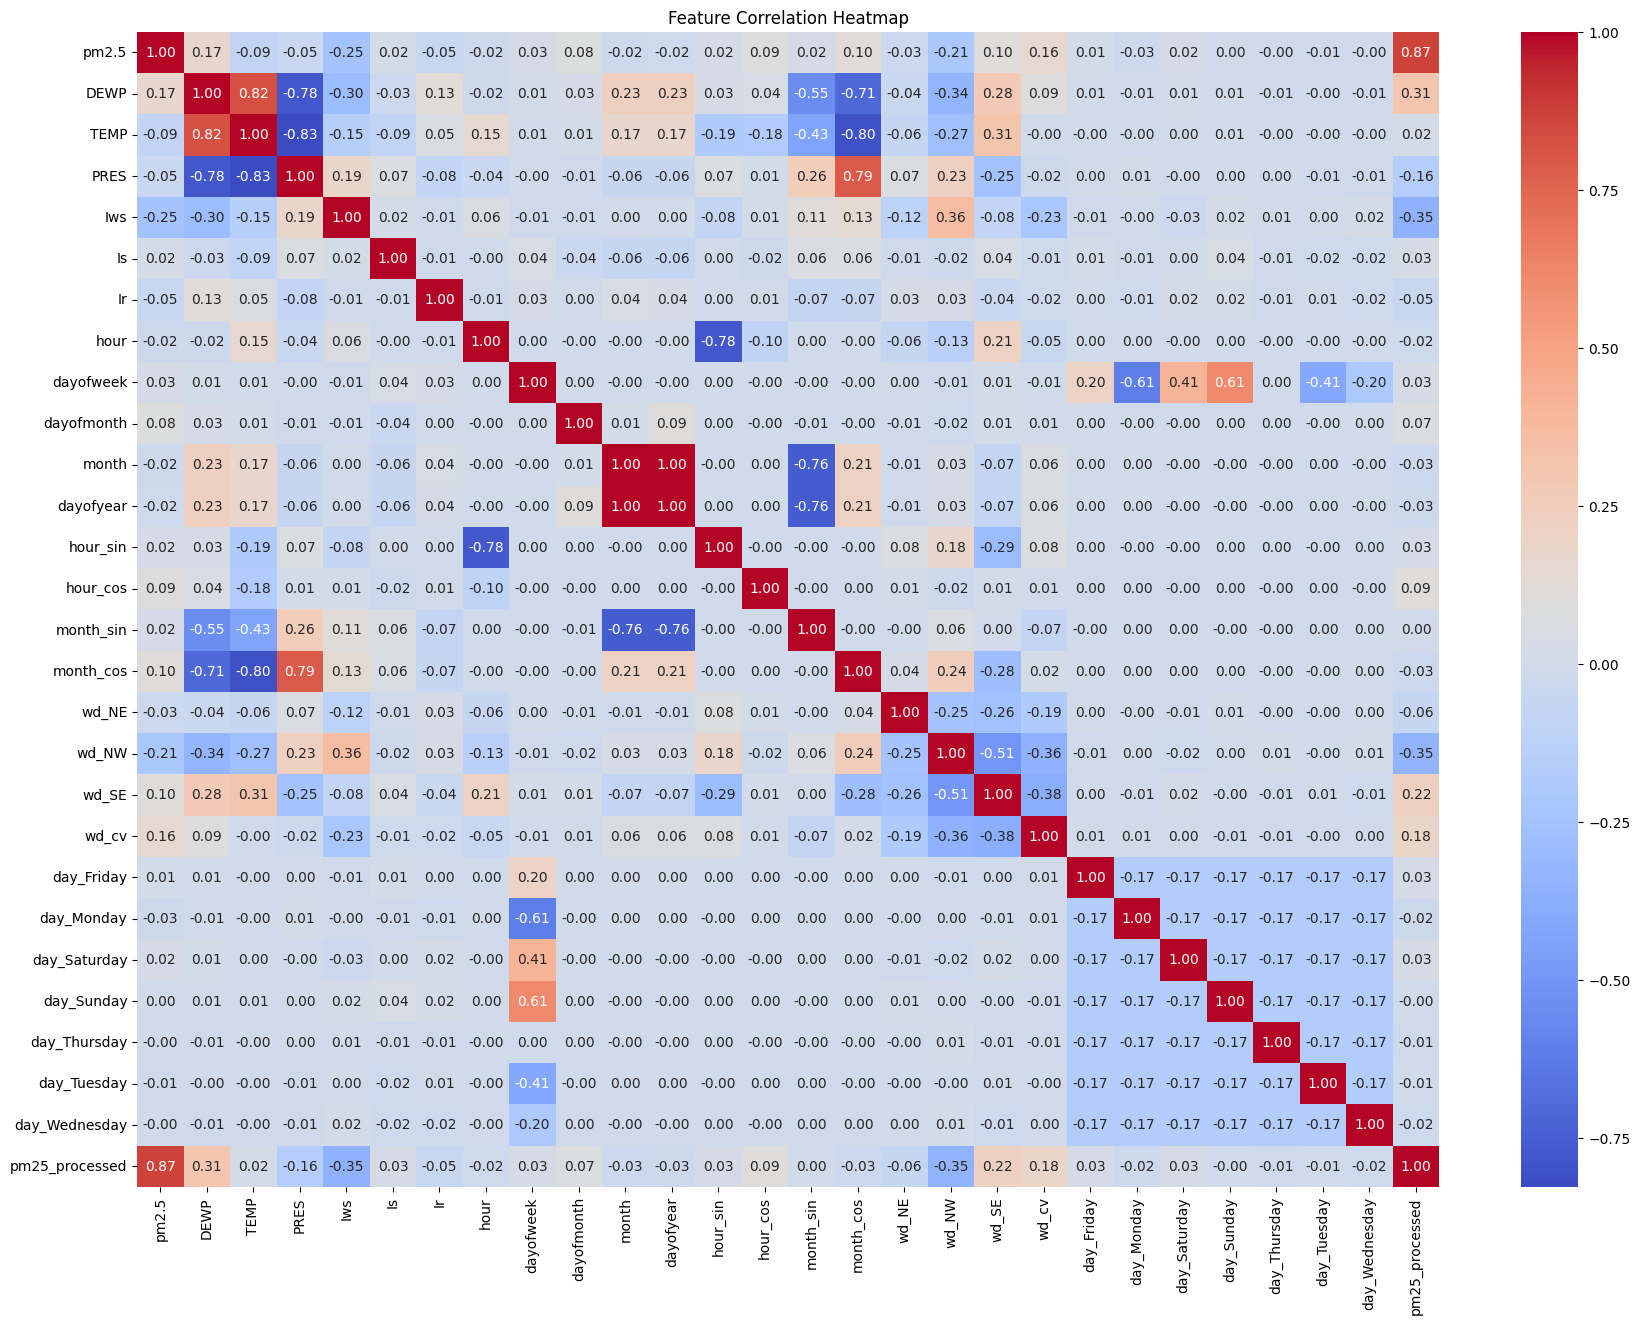

In [222]:
plt.figure(figsize=(21,15))
corr = df.corr()  # correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

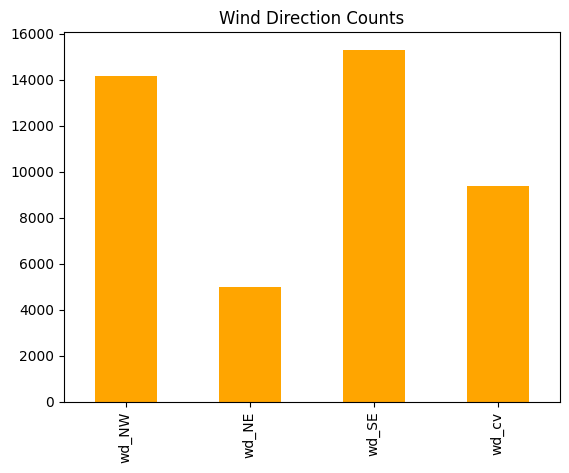

In [223]:
df[['wd_NW','wd_NE','wd_SE','wd_cv']].sum().plot(kind='bar', color='orange')
plt.title("Wind Direction Counts")
plt.show()

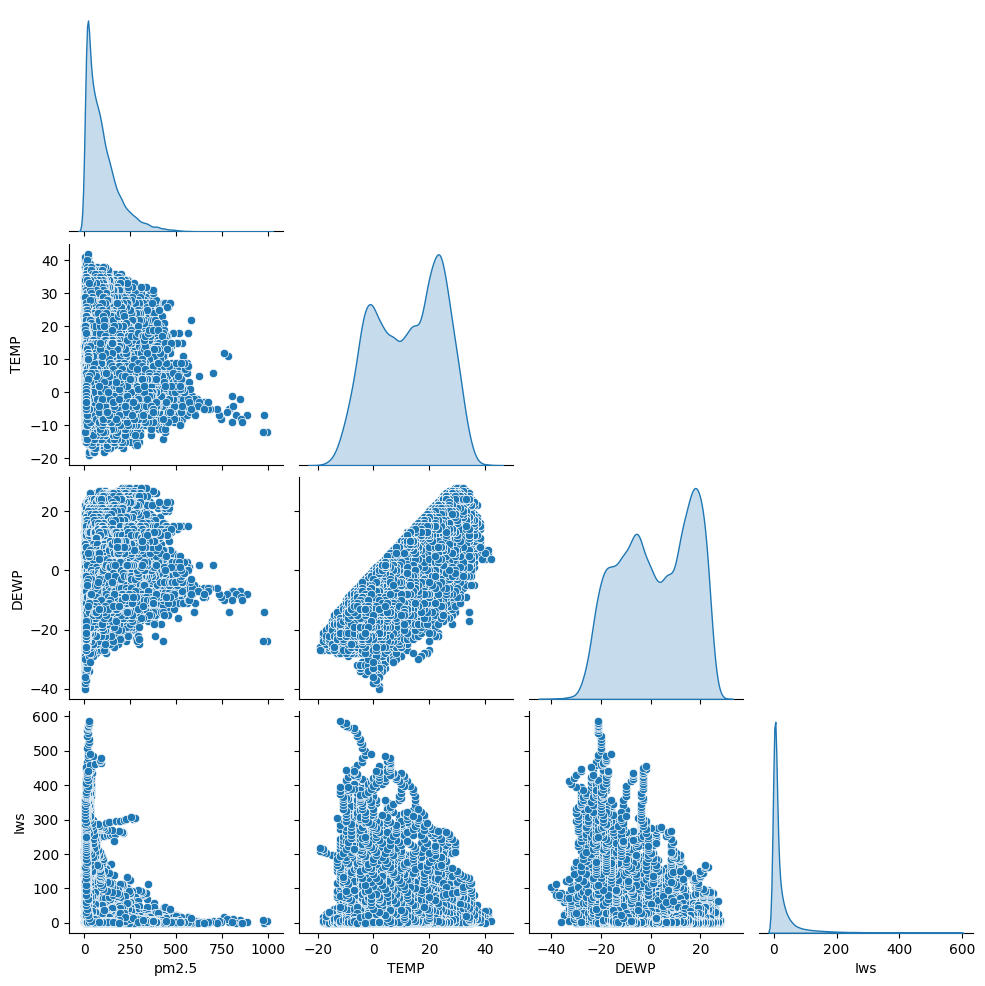

In [224]:
sns.pairplot(df[['pm2.5','TEMP','DEWP','Iws']], diag_kind='kde', corner=True)
plt.show()

In [225]:
selected_features = [
    'pm25_processed', 
    'DEWP', 'TEMP', 'Iws', 'PRES',
    'hour_sin', 'hour_cos', 
    'month_sin', 'month_cos',
    'day_Monday', 'day_Tuesday', 'day_Wednesday', 
    'day_Thursday', 'day_Friday', 'day_Saturday', 'day_Sunday'
]

data = df[selected_features]

In [226]:
print("Number of selected features:", len(selected_features))

Number of selected features: 16


In [227]:
train_size = int(len(data) * 0.8)

train = data[:train_size]
test = data[train_size:]

In [228]:
scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [229]:
TIME_STEPS = 24

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps,0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, TIME_STEPS)
X_test, y_test = create_sequences(test_scaled, TIME_STEPS)

In [230]:
from tensorflow.keras.layers import GRU, Dense,Input
from tensorflow.keras.losses import Huber

from tensorflow.keras.layers import Bidirectional

model = Sequential([
    Input(shape=(TIME_STEPS, 16)),  # Changed from 8 to 13 to match feature count
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32),
    Dense(1)
])
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss=Huber(delta=1), metrics=['mae'])

In [231]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_8 (GRU)                     │ (None, 24, 64)         │        15,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 24, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_9 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,185 (98.38 KB)

 Trainable params: 25,185 (98.38 KB)

 Non-trainable params: 0 (0.00 B)

In [232]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

In [233]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0030 - mae: 0.0526 - val_loss: 0.0023 - val_mae: 0.0587
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.0011 - mae: 0.0334 - val_loss: 8.6537e-04 - val_mae: 0.0299
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 9.2096e-04 - mae: 0.0307 - val_loss: 7.1934e-04 - val_mae: 0.0251
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 8.8771e-04 - mae: 0.0302 - val_loss: 7.1440e-04 - val_mae: 0.0259
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 8.6348e-04 - mae: 0.0294 - val_loss: 7.7635e-04 - val_mae: 0.0278
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 8.0962e-04 - mae: 0.0283 - val_loss: 7.3056e-04 - val_mae: 0.0269
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 7.8741e-04 - mae: 0.0276 - val_loss: 7.0613e-04 - val_mae: 0.0249
Epoch 8/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 8.1151e-04 - mae: 0.0283 - val_loss: 7.9588e-04 - val_mae: 0.

In [234]:
y_pred = model.predict(X_test)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [235]:
# Predict
y_pred = model.predict(X_test)

# Reshape to 2D
y_test = y_test.reshape(-1, 1)
y_pred = y_pred.reshape(-1, 1)

# Create dummy arrays for inverse scaling
dummy_test = np.zeros((len(y_test), 16))
dummy_pred = np.zeros((len(y_pred), 16))

# Put PM2.5 values in first column
dummy_test[:, 0] = y_test[:, 0]
dummy_pred[:, 0] = y_pred[:, 0]

# Inverse transform
y_test_rescaled = scaler.inverse_transform(dummy_test)[:, 0]
y_pred_rescaled = scaler.inverse_transform(dummy_pred)[:, 0]

y_test_inv = np.expm1(y_test_rescaled)
y_pred_inv = np.expm1(y_pred_rescaled)

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [236]:
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print("RMSE:", rmse)
print("MAE:", mae)

RMSE: 23.780520874048904
MAE: 14.278054318601237


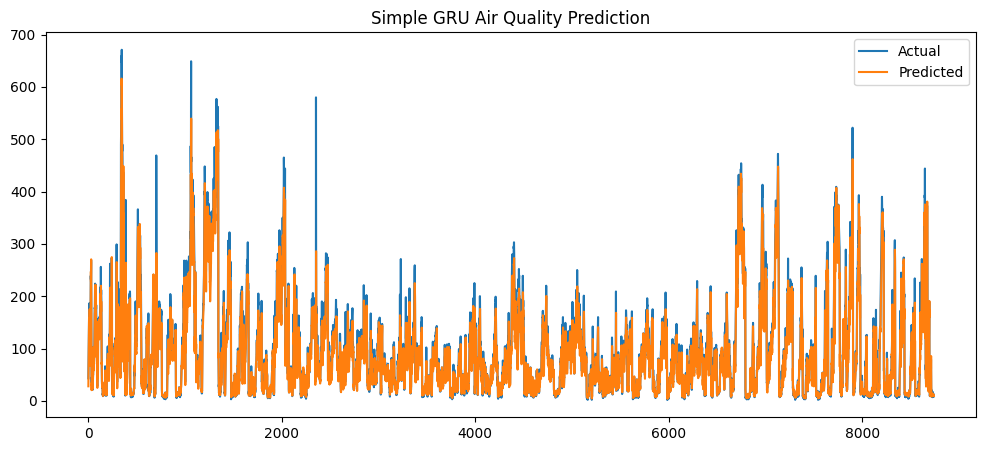

In [237]:
plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted")
plt.legend()
plt.title("Simple GRU Air Quality Prediction")
plt.show()

In [238]:
# Save your trained GRU model
model.save("model/gru_pm25_model.h5")
print("Model saved successfully!")

Model saved successfully!


In [239]:
import pickle

# Save scaler to pickle
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Scaler saved successfully!")

Scaler saved successfully!
